<a href="https://colab.research.google.com/github/soham2002/GreenRoots/blob/master/mangrove_download_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

In [ ]:
import ee
import geemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from IPython.display import Image
from IPython.display import IFrame

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize(project='ee-sohambanerjeebca23')

In [ ]:
url = 'https://ee-sohambanerjeebca23.projects.earthengine.app/view/greenroots'
IFrame(url, width=1300, height=600)

In [ ]:
west_bengal_geometry = ee.Geometry.Polygon(
        [[[87.90513575841743,21.361259666676066],
         [88.64121974279243,21.361259666676066],
          [88.64121974279243,22.009513346453204],
           [87.90513575841743,22.009513346453204],
            [87.90513575841743,21.361259666676066]]])

landsat_1999 = ee.ImageCollection('LANDSAT/LE07/C02/T1_TOA') \
            .filterBounds(west_bengal_geometry) \
            .filterDate('1999-01-01', '1999-12-31')
print("Satellite imagery of 1999 loaded successfully!")

landsat_2004 = ee.ImageCollection('LANDSAT/LE07/C02/T1_TOA') \
            .filterBounds(west_bengal_geometry) \
            .filterDate('2004-01-01', '2004-12-31')
print("Satellite imagery of 2004 loaded successfully!")

landsat_2009 = ee.ImageCollection('LANDSAT/LE07/C02/T1_TOA') \
            .filterBounds(west_bengal_geometry) \
            .filterDate('2009-01-01', '2009-12-31')
print("Satellite imagery of 2009 loaded successfully!")

landsat_2014 = ee.ImageCollection('LANDSAT/LE07/C02/T1_TOA') \
            .filterBounds(west_bengal_geometry) \
            .filterDate('2014-01-01', '2014-12-31')
print("Satellite imagery of 2014 loaded successfully!")

landsat_2019 = ee.ImageCollection('LANDSAT/LE07/C02/T1_TOA') \
            .filterBounds(west_bengal_geometry) \
            .filterDate('2019-01-01', '2019-12-31')
print("Satellite imagery of 2019 loaded successfully!")

Satellite imagery of 1999 loaded successfully!
Satellite imagery of 2004 loaded successfully!
Satellite imagery of 2009 loaded successfully!
Satellite imagery of 2014 loaded successfully!
Satellite imagery of 2019 loaded successfully!


In [ ]:
dem = ee.Image('LANDSAT/LE07/C02/T1_TOA').clip(west_bengal_geometry)

In [ ]:
Map = geemap.Map()
Map.centerObject(west_bengal_geometry, 8)
#Visualizing Landsat 7 Imagery Layer
Map.addLayer(landsat_1999, {'bands': ['B3', 'B2', 'B1'], 'min': 0.0, 'max': 0.4, 'gamma': 1.2}, 'Landsat_1999')
Map.addLayer(landsat_2004, {'bands': ['B3', 'B2', 'B1'], 'min': 0.0, 'max': 0.4, 'gamma': 1.2}, 'Landsat_2004')
Map.addLayer(landsat_2009, {'bands': ['B3', 'B2', 'B1'], 'min': 0.0, 'max': 0.4, 'gamma': 1.2}, 'Landsat_2009')
Map.addLayer(landsat_2014, {'bands': ['B3', 'B2', 'B1'], 'min': 0.0, 'max': 0.4, 'gamma': 1.2}, 'Landsat_2014')
Map.addLayer(landsat_2019, {'bands': ['B3', 'B2', 'B1'], 'min': 0.0, 'max': 0.4, 'gamma': 1.2}, 'Landsat_2018')

In [ ]:
ndvi = dem.normalizedDifference(['B3', 'B2', 'B1'])

In [ ]:
# Compute NDVI
ndvi_1999 = landsat_1999.map(lambda image: image.normalizedDifference(['B4', 'B3']))
ndvi_2004 = landsat_2004.map(lambda image: image.normalizedDifference(['B4', 'B3']))
ndvi_2009 = landsat_2009.map(lambda image: image.normalizedDifference(['B4', 'B3']))
ndvi_2014 = landsat_2014.map(lambda image: image.normalizedDifference(['B4', 'B3']))
ndvi_2019 = landsat_2019.map(lambda image: image.normalizedDifference(['B4', 'B3']))

# NDVI visualization parameters
ndvi_vis = {
    'min': 0.0,
    'max': 1.0,
    'palette': ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
                '74A901', '66A000', '529400', '3E8601', '207401', '056201',
                '004C00', '023B01', '012E01', '011D01', '011301']
}

# Add NDVI layer to the map
Map.addLayer(ndvi_1999, ndvi_vis, 'NDVI_1999')
Map.addLayer(ndvi_2004, ndvi_vis, 'NDVI_2004')
Map.addLayer(ndvi_2009, ndvi_vis, 'NDVI_2009')
Map.addLayer(ndvi_2014, ndvi_vis, 'NDVI_2014')
Map.addLayer(ndvi_2019, ndvi_vis, 'NDVI_2018')

# Display the map
Map.addLayerControl()
Map

Map(center=[21.685549310269366, 88.27317775060547], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
ndvi_1999_image = ndvi_1999.first()
ndvi_2004_image = ndvi_2004.first()
ndvi_2009_image = ndvi_2009.first()
ndvi_2014_image = ndvi_2014.first()
ndvi_2019_image = ndvi_2019.first()

# Define check_task_status function
def check_task_status(task):
    while task.active():
        print('Task still running...')
        time.sleep(15)  # Wait for 15 seconds
    print('Task completed!')


def export_image_to_drive(image, description, folder, scale, region):
    task = ee.batch.Export.image.toDrive(image=image,
                                         description=description,
                                         folder=folder,
                                         scale=scale,
                                         region=region)
    task.start()

    # Check task status
    check_task_status(task)

# Export NDVI images for each year
years = [1999, 2004, 2009, 2014, 2019]
for year, ndvi_image in zip(years, [ndvi_1999_image, ndvi_2004_image, ndvi_2009_image, ndvi_2014_image, ndvi_2019_image]):
    export_image_to_drive(ndvi_image, description=f'NDVI_{year}', folder='NDVI_Images', scale=30, region=west_bengal_geometry)


Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task completed!
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task completed!
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task completed!
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task completed!
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task still running...
Task completed!


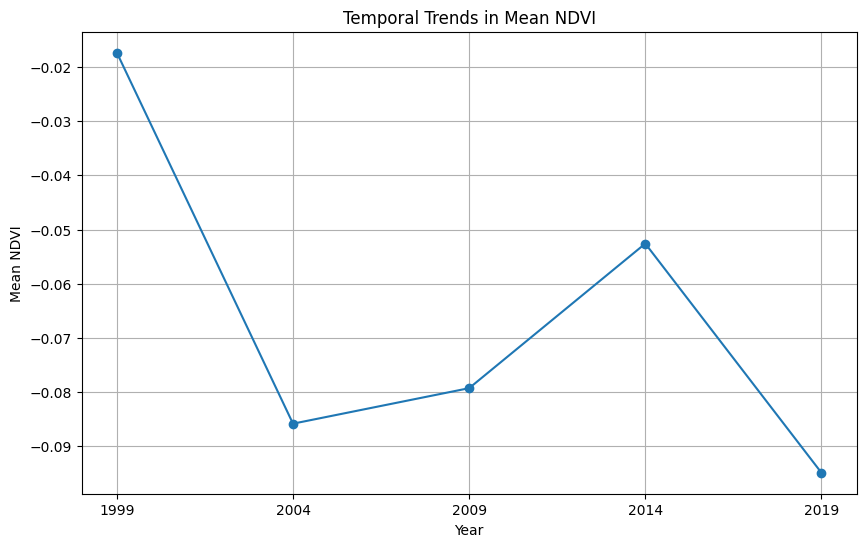

In [ ]:
years = ['1999', '2004', '2009', '2014', '2019']
# Define a function to compute mean NDVI for a given image
def compute_mean_ndvi(image):
    ndvi_mean = image.reduceRegion(reducer=ee.Reducer.mean(), geometry=west_bengal_geometry, scale=30)
    return ee.Feature(None, {'nd': ndvi_mean.get('nd')})

# Compute mean NDVI for each year
mean_ndvi_values = []
for ndvi_year in [ndvi_1999, ndvi_2004, ndvi_2009, ndvi_2014, ndvi_2019]:
    mean_ndvi = ndvi_year.map(compute_mean_ndvi)
    mean_ndvi_values.append(mean_ndvi.aggregate_array('nd').getInfo()[0])

# Plot NDVI time series
plt.figure(figsize=(10, 6))
plt.plot(years, mean_ndvi_values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean NDVI')
plt.title('Temporal Trends in Mean NDVI')
plt.grid(True)
plt.show()

Year you want to predict (e.g., 2024): 2025


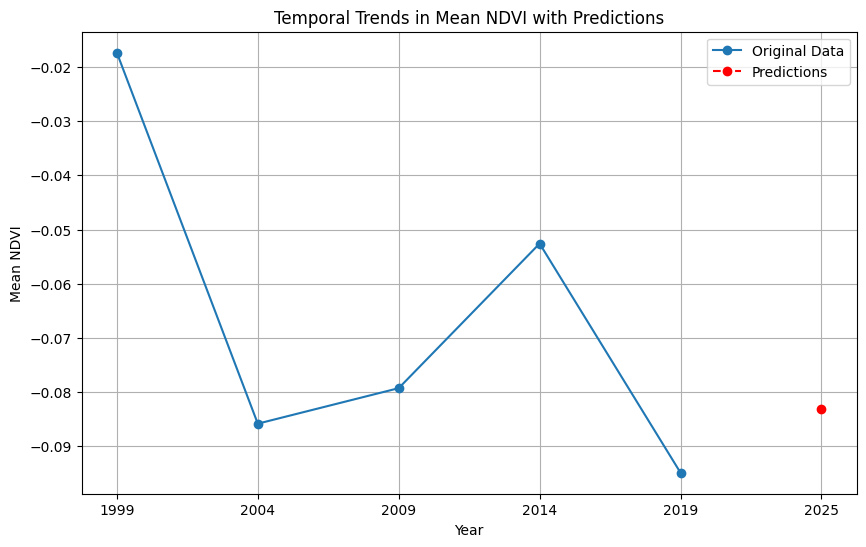

In [ ]:
ndvi_data = pd.DataFrame({'Year': years, 'Mean NDVI': mean_ndvi_values})

# Prepare features (years) and target (Mean NDVI)
X = np.array(years).reshape(-1, 1)
y = ndvi_data['Mean NDVI'].values

# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict NDVI for upcoming years
predicted_year = input("Year you want to predict (e.g., 2024): ")
upcoming_years = [predicted_year]
X_upcoming = np.array(upcoming_years).reshape(-1, 1)
ndvi_predictions = model.predict(X_upcoming)

# Plot original NDVI data and predictions
plt.figure(figsize=(10, 6))
plt.plot(ndvi_data['Year'], ndvi_data['Mean NDVI'], marker='o', linestyle='-', label='Original Data')
plt.plot(upcoming_years, ndvi_predictions, marker='o', linestyle='--', color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Mean NDVI')
plt.title('Temporal Trends in Mean NDVI with Predictions')
plt.grid(True)
plt.legend()
plt.show()